# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


In [4]:
cities

['molchanovo',
 'aasiaat',
 'hammerfest',
 'katsuren-haebaru',
 'grytviken',
 'ulan bator',
 'sarupathar',
 'praia da vitoria',
 'saint-joseph',
 'thompson',
 'ulladulla',
 'masjed soleyman',
 'kruisfontein',
 'ribeira grande',
 'bethel',
 'jolo',
 'guajara mirim',
 'pathein',
 'maragogi',
 'amursk',
 'puerto natales',
 'bilibino',
 'blackmans bay',
 'whitehorse',
 'winejok',
 'nanzhang chengguanzhen',
 'adamstown',
 'port-aux-francais',
 'betio village',
 'acarau',
 'papatowai',
 'atafu village',
 'katsuura',
 'hadibu',
 'butembo',
 'taiohae',
 'ancud',
 'saudarkrokur',
 'luderitz',
 'kedougou',
 'lebu',
 'la rioja',
 'quellon',
 'la ronge',
 'bandar lampung',
 'edinburgh of the seven seas',
 'murun-kuren',
 'sinabang',
 'ushuaia',
 'vila franca do campo',
 'broken hill',
 'albany',
 'naze',
 'lihue',
 'kenai',
 'crane',
 "nar'yan-mar",
 'hobyo',
 'stanley',
 'punta arenas',
 'greymouth',
 'nova olinda do norte',
 'remire-montjoly',
 'aginskoye',
 'renqiu',
 'weno',
 'shache',
 'trale

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | molchanovo
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | hammerfest
Processing Record 4 of Set 1 | katsuren-haebaru
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ulan bator
Processing Record 7 of Set 1 | sarupathar
Processing Record 8 of Set 1 | praia da vitoria
Processing Record 9 of Set 1 | saint-joseph
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | ulladulla
Processing Record 12 of Set 1 | masjed soleyman
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | jolo
Processing Record 17 of Set 1 | guajara mirim
Processing Record 18 of Set 1 | pathein
Processing Record 19 of Set 1 | maragogi
Processing Record 20 of Set 1 | amursk
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | bilibino

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,molchanovo,57.5817,83.7692,-14.62,96,100,2.34,RU,1708815931
1,aasiaat,68.7098,-52.8699,-18.62,85,94,4.57,GL,1708815931
2,hammerfest,70.6634,23.6821,3.25,70,80,8.75,NO,1708815931
3,katsuren-haebaru,26.3369,127.8719,17.27,78,100,6.17,JP,1708815931
4,grytviken,-54.2811,-36.5092,0.75,70,26,5.41,GS,1708815932


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,molchanovo,57.5817,83.7692,-14.62,96,100,2.34,RU,1708815931
1,aasiaat,68.7098,-52.8699,-18.62,85,94,4.57,GL,1708815931
2,hammerfest,70.6634,23.6821,3.25,70,80,8.75,NO,1708815931
3,katsuren-haebaru,26.3369,127.8719,17.27,78,100,6.17,JP,1708815931
4,grytviken,-54.2811,-36.5092,0.75,70,26,5.41,GS,1708815932


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

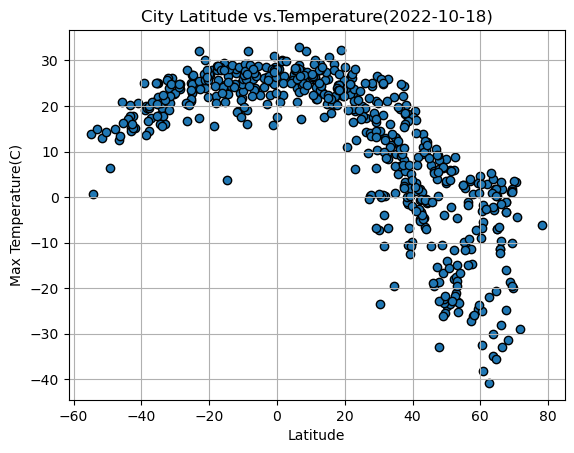

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

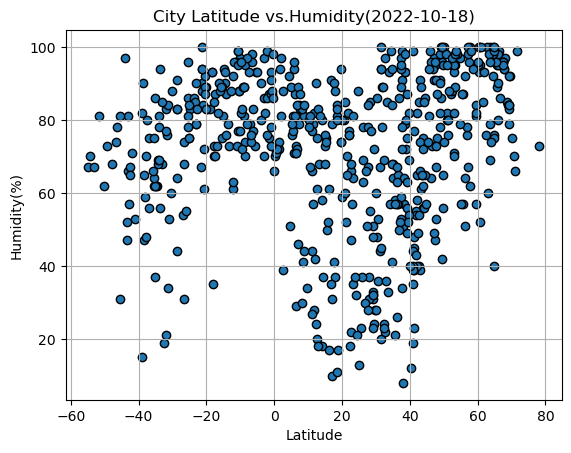

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

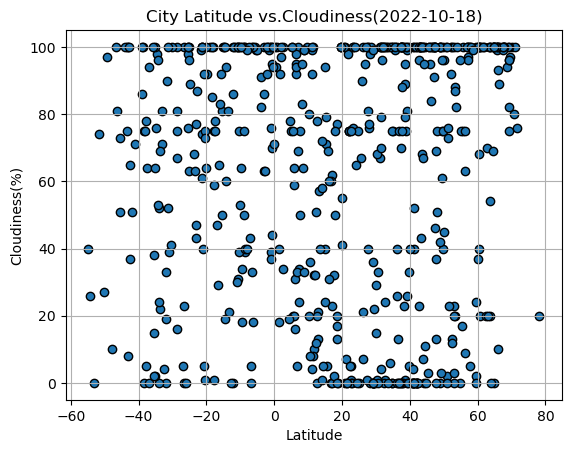

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

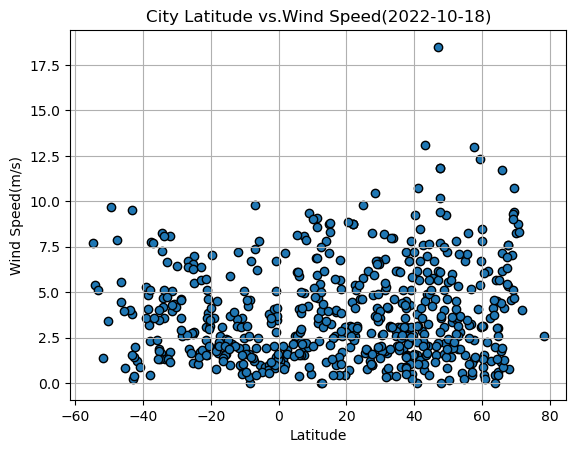

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,molchanovo,57.5817,83.7692,-14.62,96,100,2.34,RU,1708815931
1,aasiaat,68.7098,-52.8699,-18.62,85,94,4.57,GL,1708815931
2,hammerfest,70.6634,23.6821,3.25,70,80,8.75,NO,1708815931
3,katsuren-haebaru,26.3369,127.8719,17.27,78,100,6.17,JP,1708815931
5,ulan bator,47.9077,106.8832,-32.93,75,51,0.00,MN,1708815651


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,0.75,70,26,5.41,GS,1708815932
8,saint-joseph,-21.3667,55.6167,25.21,90,74,2.34,RE,1708815934
10,ulladulla,-35.3500,150.4667,21.35,62,15,1.86,AU,1708815747
12,kruisfontein,-34.0033,24.7314,17.70,78,52,4.20,ZA,1708815935
16,guajara mirim,-10.7828,-65.3394,22.88,99,100,0.87,BR,1708815937


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.8


Text(0, 0.5, 'Temperature(C)')

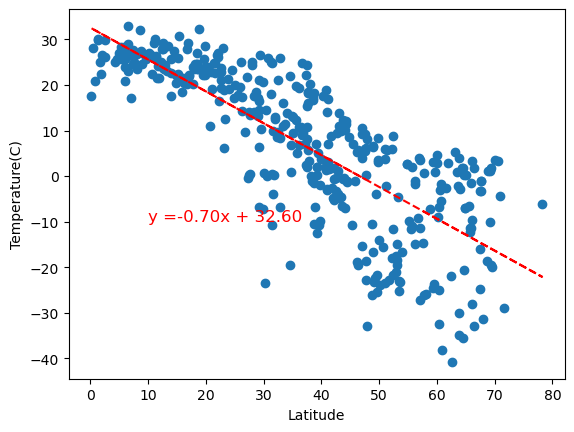

In [22]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.62


Text(0, 0.5, 'Temperature(C)')

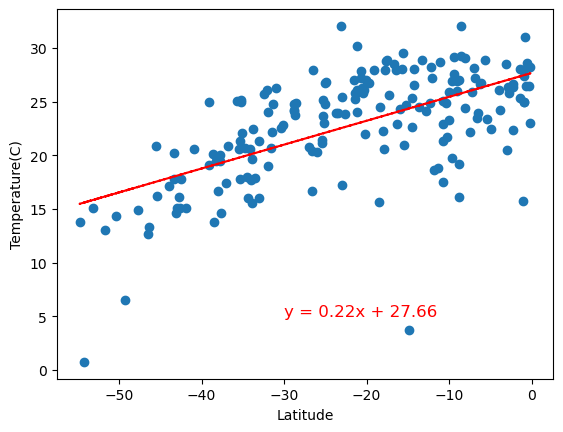

In [23]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** 
In northern hemisphere, a city's latitude and temperature have a strong negative coorelation(-0.8) - that is to say the higher latitude of the city, the lower temperature the city would be. On the contrary; and in southern hemisphere, a city's latitude and temperature have a fair positive coorelation(0.62) - that is to say the higher latitude of the city, the higher temperature the city would be.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.34


Text(0, 0.5, 'Humidity(%)')

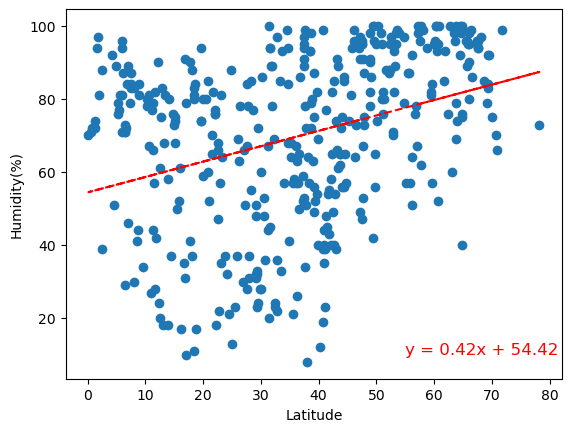

In [24]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.47


Text(0, 0.5, 'Humidity(%)')

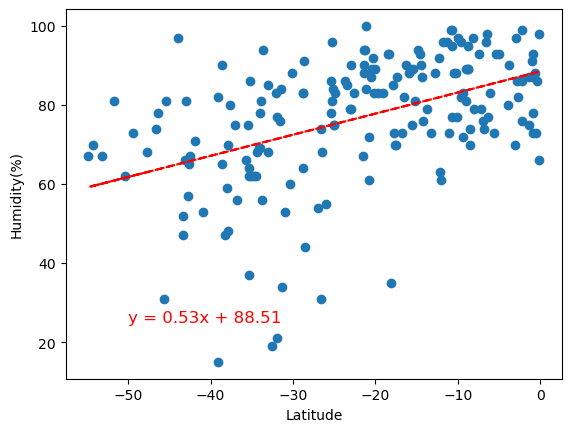

In [25]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

So, in northern hemisphere, a city's latitude and humidity have a might weak positive coorelation(0.34) - that is to say with latitude increase, city's humidity is likely to increase but not much, and in southern hemisphere, a city's latitude and humidity also have a might weak positive coorelation(0.47) - that is to say with latitude increase, city's humidity is likely to increase but quick minimal.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.19


Text(0, 0.5, 'Cloudiness(%)')

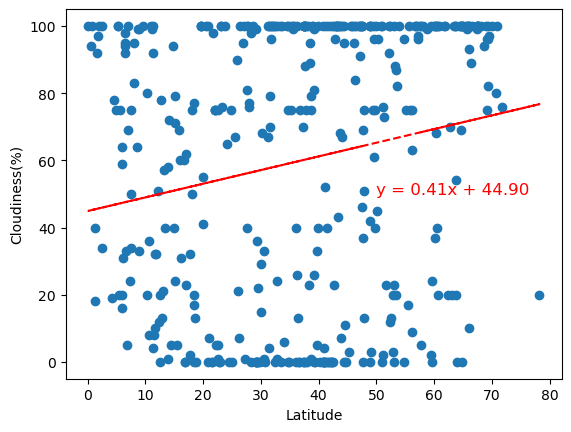

In [26]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.19


Text(0, 0.5, 'Cloudiness(%)')

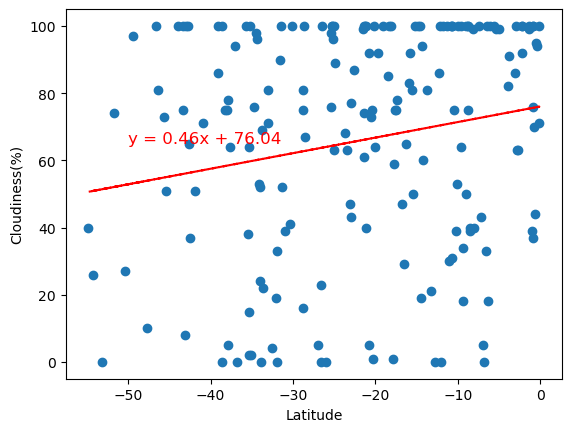

In [27]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In northern hemisphere, a city's latitude and cloudiness level have weak coorelation(0.19) - that is to say a city's cloudiness level does little related to its latitude, in southern hemisphere, it is a similar situation with weak coorelation(0.19) between city's latitude and cloudiness level.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.1


Text(0, 0.5, 'Wind Speed(m/s)')

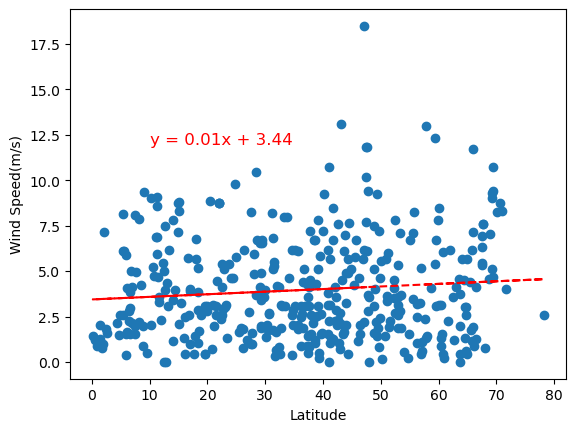

In [28]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.25


Text(0, 0.5, 'Wind Speed(m/s)')

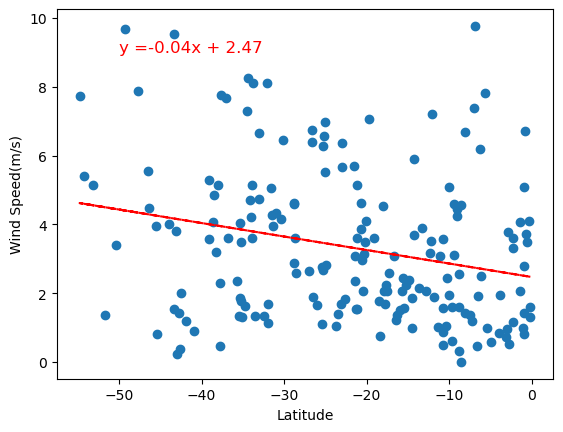

In [29]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
 In northern hemisphere, a city's latitude and wind speed have minor negative coorelation(-0.25) - that is to say a city's windy level does not much related to its latitude, in southern hemisphere, it is a similar situation with very minor negative coorelation(-0.25) between city's latitude and wind speed.